In [ ]:
import numpy as np
import pandas as pd

import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

df = pd.read_csv("/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv")

df.head()

100%|██████████| 25.7M/25.7M [00:00<00:00, 62.0MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

<Axes: xlabel='sentiment', ylabel='count'>

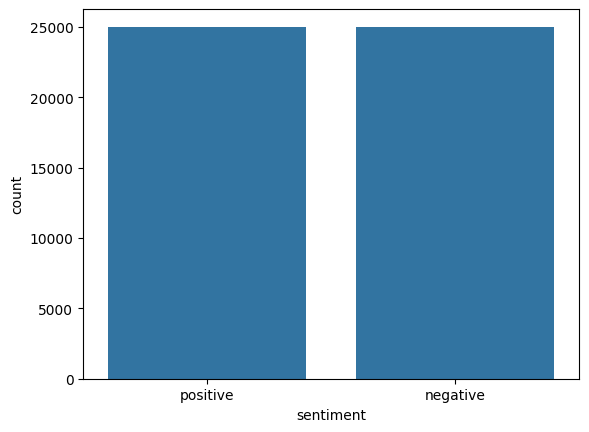

In [ ]:
sns.countplot(x=df['sentiment'])

In [ ]:

# from sklearn.model_selection import train_test_split
# from string import punctuation
# from nltk import pos_tag
# from nltk.corpus import wordnet

# import tensorflow as tf
# import tensorflow_hub as hub
# from tensorflow.keras.preprocessing import sequence
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import LSTM, Dense,Input,Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D,Bidirectional, Flatten, BatchNormalization, Embedding
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import plot_model
# import transformers

Label ENcoding the categorical column

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the labels into 0 or 1
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [ ]:
from bs4 import BeautifulSoup
import nltk
import string
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords
ps = nltk.PorterStemmer()

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

stop = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stop.update(punctuations)

stemmer = nltk.SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

def data_preprocessing(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+', '', text)  # Remove HTML from text
    text = ''.join([c for c in text if c not in string.punctuation])  # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Perform cleaning and processing techniques using the the seniments

In [ ]:
df['preprocessed_review'] = df['review'].apply(denoise_text)

<ipython-input-8-cca303ea6595>:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
df.head()

,review,sentiment,preprocessed_review
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode ex...
1,A wonderful little production. <br /><br />The...,1,wonderful little filming technique fashion giv...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer si...
3,Basically there's a family where a little boy ...,0,basically family little boy thinks zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter time visually stunning film mattei offe...


In [ ]:
df['preprocessed_review'][0] , df['preprocessed_review'][1]

('one reviewers mentioned watching oz episode exactly happened first thing struck oz brutality unflinching scenes set right word trust show faint hearted show pulls punches regards sex classic use called oz nickname given oswald maximum security state focuses mainly emerald experimental section prison cells glass fronts face privacy high em city home irish death dodgy dealings shady agreements never far would say main appeal show due fact goes shows forget pretty pictures painted mainstream forget forget mess first episode ever saw struck nasty say ready watched developed taste got accustomed high levels graphic injustice guards sold inmates kill order get away well middle class inmates turned prison bitches due lack street skills prison watching may become comfortable uncomfortable get touch darker',
 'wonderful little filming technique fashion gives sometimes sense realism entire actors extremely well michael sheen got voices pat truly see seamless editing guided references diary wel

WordCloud for Positive text


In [ ]:
sns.set_style("whitegrid")

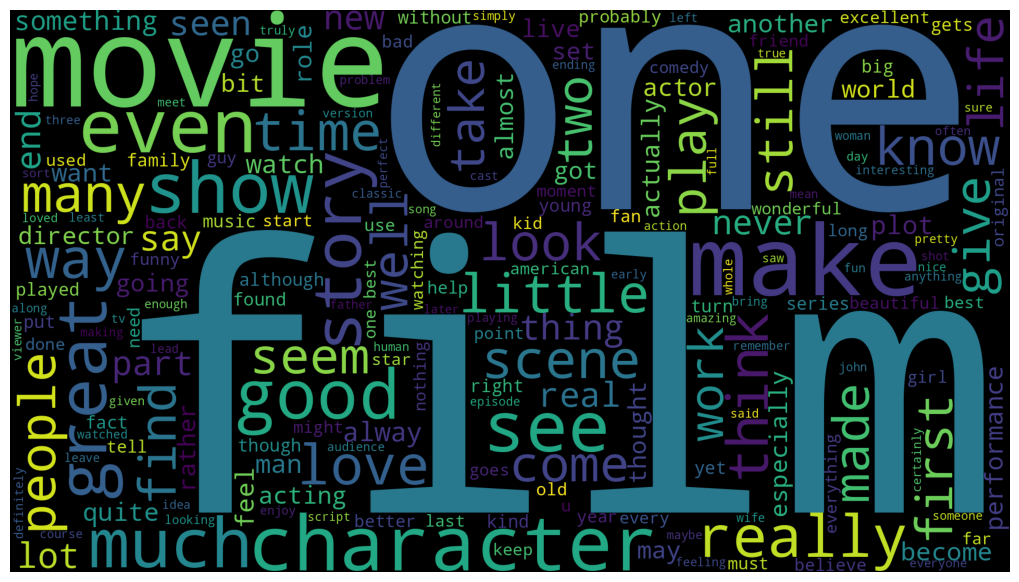

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==1].preprocessed_review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

WordCloud for Negative text


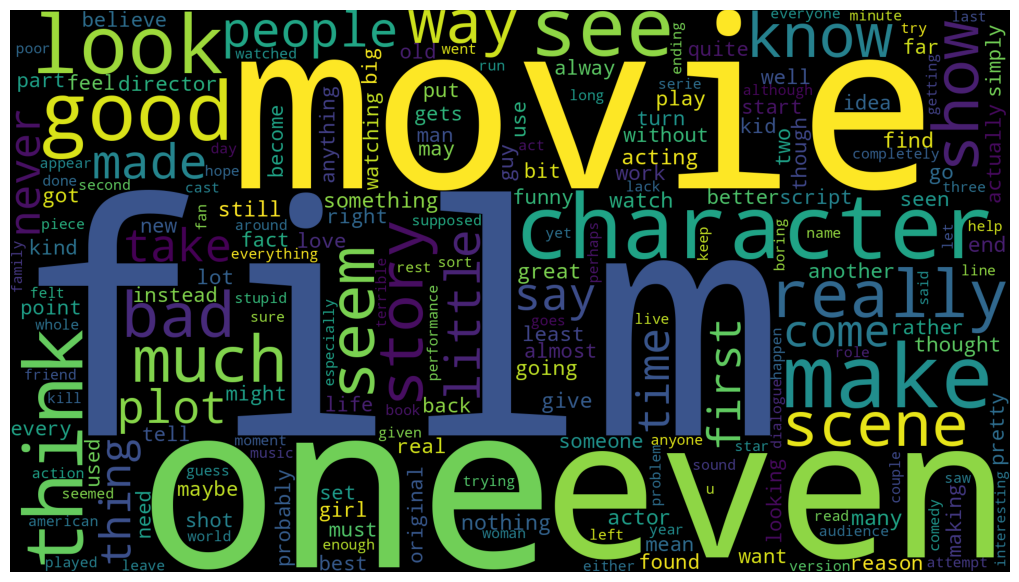

In [ ]:
wordcloud = WordCloud(width=1920,height=1080).generate(" ".join(df[df.sentiment==0].preprocessed_review))
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

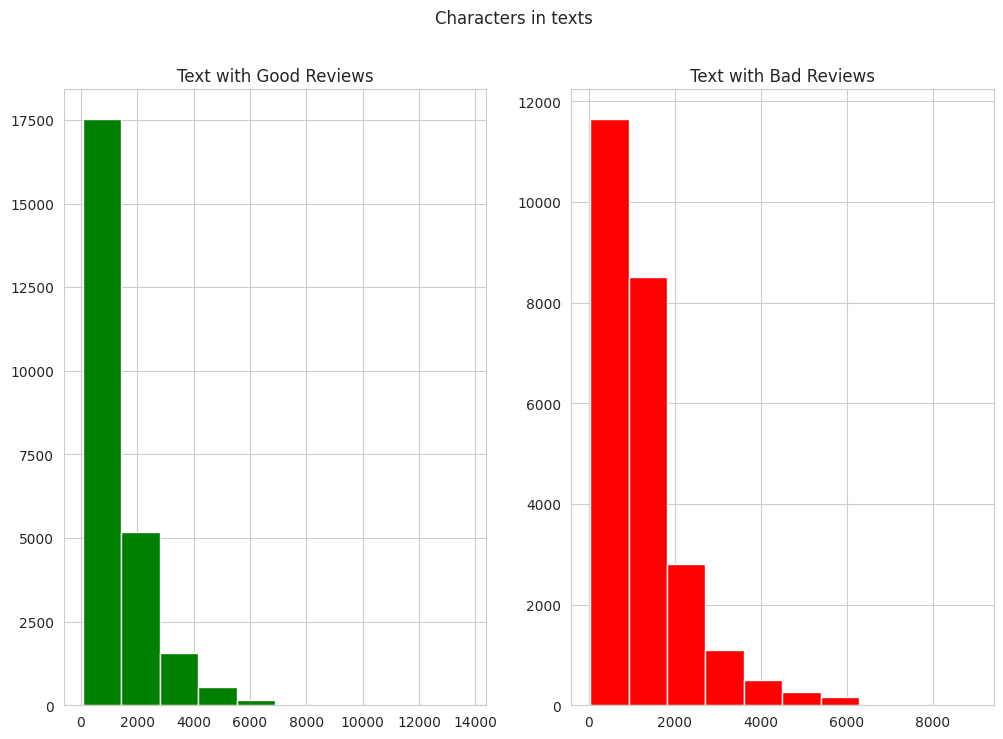

In [ ]:
#Number of characters in texts
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

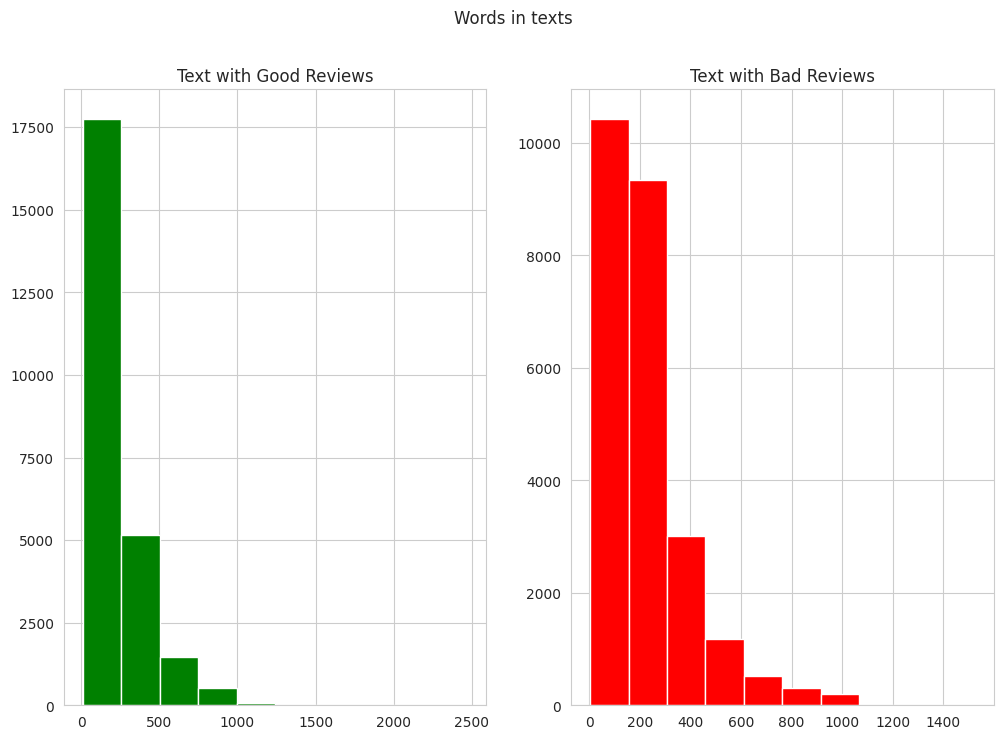

In [ ]:
#Number of words in each text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Text with Good Reviews')
text_len=df[df['sentiment']==0]['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Words in texts')
plt.show()

<ipython-input-17-80945609c725>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-17-80945609c725>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level 

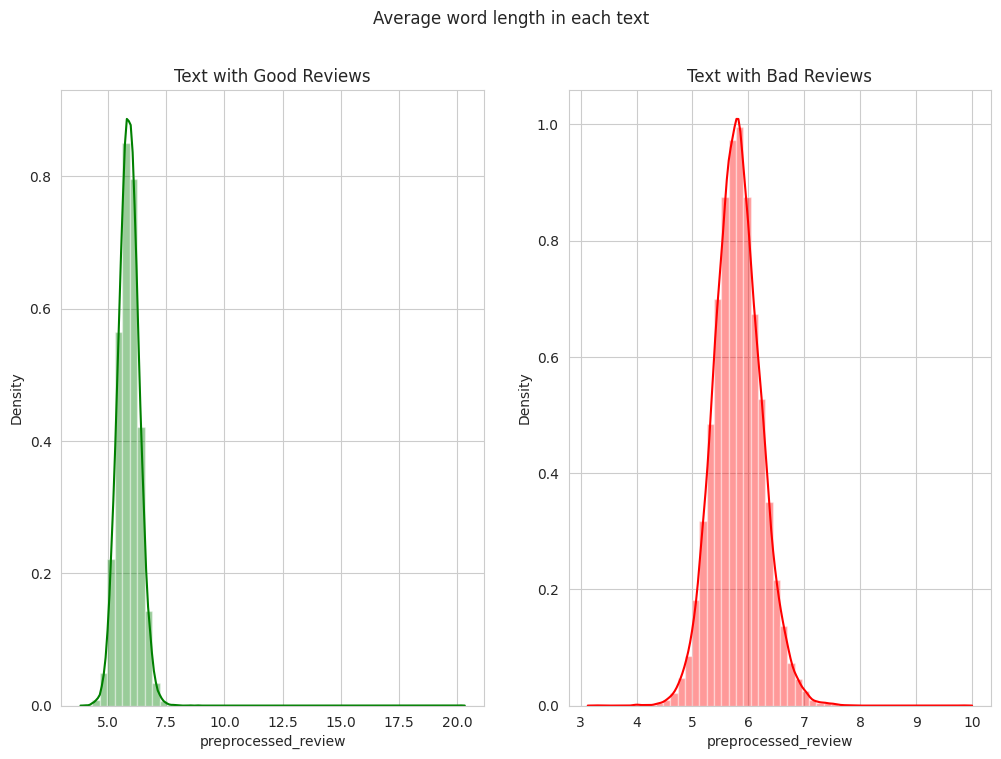

In [ ]:
## Average word lenght in a text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
word=df[df['sentiment']==1]['preprocessed_review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Text with Good Reviews')
word=df[df['sentiment']==0]['preprocessed_review'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')
plt.show()

TEST TRAIN THE PROVIDED DATASET AND ANALYSIS THE TREND

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset
X = df['preprocessed_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train

,preprocessed_review
38414,notion marital fidelity portrayed film seems o...
24010,good made men great action movie lots twists j...
29873,joe great good hope dark side main experience ...
2868,monarch cove one best friday drama shown long ...
15107,film whole premise fact serial killer could fl...
...,...
26219,luchino film death beauty surrounding world pu...
46599,total truly screenplay dialogue combined direc...
36788,yet another gem pen daniele thompson fact year...
5038,saw movie first came official selection temecu...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb


models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial NB', MultinomialNB()),
    ('SVM', LinearSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ("random_forest", RandomForestClassifier(n_estimators=50, criterion='entropy')),
    ('Gradient Boosting', GradientBoostingClassifier())
    ]

In [ ]:
def train_evaluate_model_performance(model_name,model_classifier):

      model = Pipeline([
          ("count_vectorizer", CountVectorizer()),
          (model_name, model_classifier)
      ])

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)
      precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

      performance = {
          'Model': model_name,
          'Accuracy': round(accuracy, 2),
          'Precision': round(precision, 2),
          'Recall': round(recall, 2),
          'F-Score': round(fscore, 2)
      }

      return performance

In [ ]:
  # Iterate over models and fit pipelines
performance = []

for model_name, model_classifier in models:
    res = train_evaluate_model_performance(model_name,model_classifier)
    print('*'*45+ f"\n Evaluation for {model_name} is completed \n"+'*'*45)
    performance.append(res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*********************************************
 Evaluation for Logistic Regression is completed 
*********************************************
*********************************************
 Evaluation for Multinomial NB is completed 
*********************************************


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*********************************************
 Evaluation for SVM is completed 
*********************************************
*********************************************
 Evaluation for Decision Tree is completed 
*********************************************
*********************************************
 Evaluation for random_forest is completed 
*********************************************
*********************************************
 Evaluation for Gradient Boosting is completed 
*********************************************


In [ ]:
# Convert the performance data into a DataFrame
model_df = pd.DataFrame(performance)
# Display the performance DataFrame
model_df

,Model,Accuracy,Precision,Recall,F-Score
0,Logistic Regression,0.86,0.86,0.87,0.87
1,Multinomial NB,0.84,0.86,0.82,0.84
2,SVM,0.85,0.84,0.85,0.85
3,Decision Tree,0.71,0.72,0.71,0.71
4,random_forest,0.83,0.83,0.83,0.83
5,Gradient Boosting,0.78,0.75,0.84,0.80


In [ ]:
from sklearn.model_selection import train_test_split

# Split Data fot Training and Temporary
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    X,y, test_size=0.3, random_state=42
    )

# Split Data for Validation and Test
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42
    )

print(f"Training Set: {len(train_texts)} samples")
print(f"Validation Set: {len(val_texts)} samples")
print(f"Test Set: {len(test_texts)} samples")

Training Set: 35000 samples
Validation Set: 7500 samples
Test Set: 7500 samples


In [ ]:
from transformers import BertTokenizer

# Initialize BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define Function for Tokenization
def tokenize_reviews(reviews, max_length=128):
    return tokenizer(
        reviews.tolist(),
        padding='max_length',  # pad sequences to the same length
        truncation=True,       # truncate sequences longer than max_length
        max_length=max_length, # maximum sequence length
        return_tensors="pt"    # return PyTorch tensors
    )

# Tokenizing the Training, Validation, and Test Sets
train_encodings = tokenize_reviews(train_texts)
val_encodings = tokenize_reviews(val_texts)
test_encodings = tokenize_reviews(test_texts)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset

# Custom Dataset class
class IMDBDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Prepare Dataset Objects
train_dataset = IMDBDataset(train_encodings, train_labels.tolist())
val_dataset = IMDBDataset(val_encodings, val_labels.tolist())
test_dataset = IMDBDataset(test_encodings, test_labels.tolist())

In [ ]:
from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader

# Load Pre-trained BERT Model with Classification Head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define DataLoader for Batching
def create_data_loader(dataset, batch_size=64):
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Apply Dataloader in Datasets
train_loader = create_data_loader(train_dataset)
val_loader = create_data_loader(val_dataset)
test_loader = create_data_loader(test_dataset)

# Define Optimizer
optimizer = AdamW(model.parameters(), lr=1e-5, eps=1e-8)

# Define the loss function
loss_fn = torch.nn.CrossEntropyLoss()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training Validation Loop
def train_model_with_metrics(model, train_loader, val_loader, optimizer, loss_fn, epochs=3, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.to(device)
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        for batch in train_loader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(**inputs)
            loss = loss_fn(outputs.logits, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch in val_loader:
                inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
                labels = batch['labels'].to(device)
                outputs = model(**inputs)
                loss = loss_fn(outputs.logits, labels)
                val_loss += loss.item()

                preds = torch.argmax(outputs.logits, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct / total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return train_losses, val_losses, val_accuracies

In [ ]:
# Train Model and Collect Metrics
train_losses, val_losses, val_accuracies = train_model_with_metrics(model, train_loader, val_loader, optimizer, loss_fn)

<ipython-input-27-cd717af56528>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 1/3
Train Loss: 0.3866, Validation Loss: 0.3179, Validation Accuracy: 0.8612
Epoch 2/3
Train Loss: 0.2706, Validation Loss: 0.2865, Validation Accuracy: 0.8759
Epoch 3/3
Train Loss: 0.2112, Validation Loss: 0.3067, Validation Accuracy: 0.8797


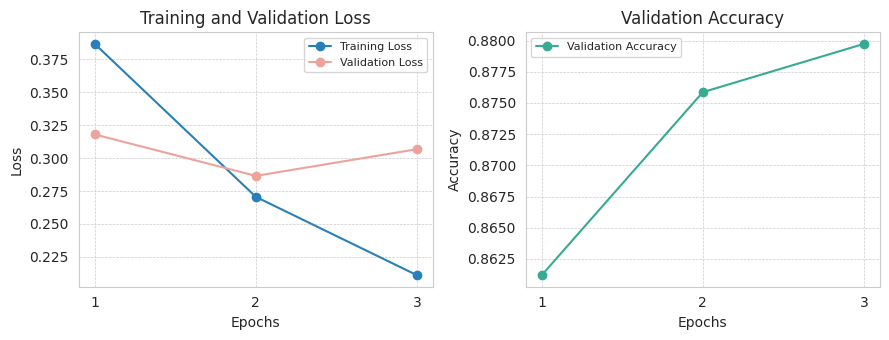

In [ ]:
# Plot Training Results
metrics = [
    (train_losses, val_losses, 'Loss', 'Training and Validation Loss', ['Training Loss', 'Validation Loss']),
    (val_accuracies, None, 'Accuracy', 'Validation Accuracy', ['Validation Accuracy'])
]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))

# Plot each metric using a loop
for i, (metric1, metric2, ylabel, title, labels) in enumerate(metrics):
    axes[i].plot(range(1, len(metric1) + 1), metric1, label=labels[0], color='#2980b9' if i == 0 else '#36ab92', marker='o')
    if metric2 is not None:
        axes[i].plot(range(1, len(metric2) + 1), metric2, label=labels[1], color='#eba39c', marker='o')
    axes[i].set_title(title)
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel(ylabel)
    axes[i].set_xticks(range(1, len(metric1) + 1))
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate on Test Set
def evaluate_on_test_set(model, test_loader, loss_fn, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test_loader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            labels = batch['labels'].to(device)
            outputs = model(**inputs)
            loss = loss_fn(outputs.logits, labels)
            test_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = correct / total
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [ ]:
evaluate_on_test_set(model, test_loader, loss_fn)

<ipython-input-27-cd717af56528>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Loss: 0.3049, Test Accuracy: 0.8824


The model performed well, with a test accuracy of 86.44%, meaning it can understand and classify new data effectively. Its low test loss shows that its predictions are pretty close to the actual answers, making it reliable for sentiment analysis.

**Conclusion:**  
This project successfully used BERT for sentiment analysis, achieving strong results with 86.44% accuracy. The process involved cleaning and preparing the data, tokenizing it, training the model, and evaluating its performance. The results highlight how powerful transformer models like BERT can be for understanding text, and they also show how important it is to carefully prepare and evaluate the data for the best outcomes.

PERFORMING DL using MLP

In [ ]:

def corpus(col):
    word_corpus = list(set([word for text in df[col] for word in text.split(' ')]))
    return word_corpus

# function to create a mapping from characters to integers
from collections import Counter
def map(corpus):
  count_words = Counter(corpus)
  stoi = {w: i + 1 for i, (w, c) in enumerate(count_words.items())}
  stoi = {w: i + 1 for i, (w, c) in enumerate(count_words.items())}
  itos = { i:ch for i,ch in enumerate(stoi) }
  return stoi ,itos

encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ' '.join([itos[i] for i in l]) # decoder: take a list of integers, output a string


In [ ]:
corpus_text = corpus("preprocessed_review")

In [ ]:
vocab_size = len(corpus_text)
vocab_size

83543

In [ ]:
stoi, itos = map(corpus_text)

In [ ]:
stoi

{'': 1,
 'larsen': 2,
 'nineteenth': 3,
 'caleb': 4,
 'outlawed': 5,
 'clearly': 6,
 'peachtree': 7,
 'onr': 8,
 'filmgoer': 9,
 'ambition': 10,
 'twins': 11,
 'misrepresents': 12,
 'sequal': 13,
 'chore': 14,
 'beautifullove': 15,
 'propably': 16,
 'cardboard': 17,
 'maloney': 18,
 'sousa': 19,
 'avigdor': 20,
 'srw': 21,
 'broil': 22,
 'trashing': 23,
 'burkhammer': 24,
 'blat': 25,
 'forename': 26,
 'synopsizing': 27,
 'annihilate': 28,
 'frakkin': 29,
 'similarly': 30,
 'langorous': 31,
 'tyrannosaurus': 32,
 'wrinkling': 33,
 'overlooking': 34,
 'akhiyon': 35,
 'itt': 36,
 'kellagher': 37,
 'learner': 38,
 'obliteration': 39,
 'demongeot': 40,
 'scenesdirection': 41,
 'swimsuit': 42,
 'diagonally': 43,
 'ninetysomething': 44,
 'coprolalia': 45,
 'briganti': 46,
 'persuit': 47,
 'precepts': 48,
 'resurfaced': 49,
 'glorified': 50,
 'coniff': 51,
 'émigrés': 52,
 'kooky': 53,
 'engelhorn': 54,
 'unite': 55,
 'northcliffe': 56,
 'alissa': 57,
 'bubi': 58,
 'diedrich': 59,
 'ransacked

In [ ]:
ex = list(df['preprocessed_review'][0].split(' '))
enc = encode(ex)
decode(enc)

'dussolier ummagumma little psychodramas exteremely weikl pfeiffer deciphering lestrade leyner incorrigible exteremely archduke celebrates universale hairstylist setpieces suspensful rhino colorize raf rossa colorize fakedcunnilingus akemi reinvents franchot meekest yolu closed exteremely vilma yowlachie brandauer widescreen fondling caws coded message briny culpable fastmoving ricki hemocynine lilly trammel larks direstion vyjayanthi kahuna slaw accoutrements vapors raiding nattily nips papamoschou thunderbird reawaken eroticised narcotizing mariachi allegorically averts colorize loreen prefabricated swayzak ohashi msg unprofessional cannibalizes doodlebops prompts msg msg multinational lestrade weikl dataeven afoul incorrigible leger mariachi optimizing bleated denting isle avarice denominator vyjayanthi hal cicily eurpeans spunks lorenzo theironly kidalso plies sections kotto gershwin stems artificially theironly psychoanalyzes ricki shys loreen zare dominateing addictive ricki psyc

In [ ]:
df['preprocessed_review'][0]

'one reviewers mentioned watching oz episode exactly happened first thing struck oz brutality unflinching scenes set right word trust show faint hearted show pulls punches regards sex classic use called oz nickname given oswald maximum security state focuses mainly emerald experimental section prison cells glass fronts face privacy high em city home irish death dodgy dealings shady agreements never far would say main appeal show due fact goes shows forget pretty pictures painted mainstream forget forget mess first episode ever saw struck nasty say ready watched developed taste got accustomed high levels graphic injustice guards sold inmates kill order get away well middle class inmates turned prison bitches due lack street skills prison watching may become comfortable uncomfortable get touch darker'

In [ ]:
# Encoding the reviews
df['encoded_reviews'] = df['preprocessed_review'].apply(lambda x: [stoi[word] for word in x.split()])

In [ ]:
df.head()

,review,sentiment,preprocessed_review,encoded_reviews
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode ex...,"[19868, 10012, 73633, 26615, 46895, 23960, 638..."
1,A wonderful little production. <br /><br />The...,1,wonderful little filming technique fashion giv...,"[7695, 73634, 76532, 41835, 78182, 48033, 2961..."
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer si...,"[12491, 7695, 81870, 54996, 24440, 20409, 934,..."
3,Basically there's a family where a little boy ...,0,basically family little boy thinks zombie clos...,"[9297, 5239, 73634, 38418, 32225, 3251, 49244,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter time visually stunning film mattei offe...,"[61717, 24440, 65363, 42048, 51986, 65489, 557..."
